In [1]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
demo=pd.read_csv('D:\\pywork\\e-books\\Data-master\\python\\Demographics_State.csv')

In [6]:
demo


,region,total_population,percent_white,percent_black,percent_asian,percent_hispanic,per_capita_income,median_rent,median_age
0,alabama,4799277,67,26,1,4,23680,501,38.1
1,alaska,720316,63,3,5,6,32651,978,33.6
2,arizona,6479703,57,4,3,30,25358,747,36.3
3,arkansas,2933369,74,15,1,7,22170,480,37.5
4,california,37659181,40,6,13,38,29527,1119,35.4
5,colorado,5119329,70,4,3,21,31109,825,36.1
6,connecticut,3583561,70,9,4,14,37892,880,40.2
7,delaware,908446,65,21,3,8,29819,828,38.9
8,district of columbia,619371,35,49,3,10,45290,1154,33.8
9,florida,19091156,57,15,2,23,26236,838,41.0


In [9]:
x=demo[['total_population','percent_white','percent_black','percent_asian','percent_hispanic','per_capita_income','median_rent']]

In [11]:
y=demo[['median_age']]

In [12]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [13]:
labelencoder=LabelEncoder()

In [14]:
onehotencoder=OneHotEncoder(categorical_features=[7])

In [15]:
x=onehotencoder.fit_transform(x).toarray()

C:\Users\aa\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\aa\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


IndexError: index 7 is out of bounds for axis 0 with size 7

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
regressor=LinearRegression()

In [20]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
y_pred_age =pd.DataFrame(regressor.predict(x_test),columns=['y_pred_median_age'])

In [52]:
y_pred_age

,y_pred_median_age
0,38.902716
1,31.752999
2,36.740101
3,38.247041
4,35.688647
5,35.515014
6,38.711417
7,38.069770
8,37.285211
9,37.502743


In [53]:
actual=pd.DataFrame(y_test)

In [54]:
actual

,median_age,y_test_predicted,y_pred_median_age
29,41.5,NaN,NaN
11,38.3,NaN,NaN
10,35.6,37.367528,37.367528
22,39.1,NaN,NaN
2,36.3,36.740101,36.740101
28,36.6,NaN,NaN
45,42.0,NaN,NaN
32,38.1,NaN,NaN
26,39.9,NaN,NaN
4,35.4,35.688647,35.688647


In [49]:
join=pd.merge(y_pred_age,actual)

In [50]:
join

,y_pred_median_age,median_age,y_test_predicted
0,36.740101,36.3,36.740101
1,35.688647,35.4,35.688647
2,37.367528,35.6,37.367528


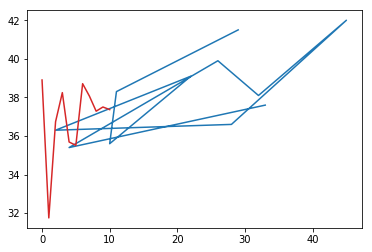

In [48]:
fig1=plt.figure()
ax1=fig1.add_subplot(111)
ax1.plot(y_test)
ax1.plot(y_pred_age)

In [45]:
actual

,median_age,y_test_predicted,y_pred_median_age
29,41.5,NaN,NaN
11,38.3,NaN,NaN
10,35.6,37.367528,37.367528
22,39.1,NaN,NaN
2,36.3,36.740101,36.740101
28,36.6,NaN,NaN
45,42.0,NaN,NaN
32,38.1,NaN,NaN
26,39.9,NaN,NaN
4,35.4,35.688647,35.688647
